<a href="https://colab.research.google.com/github/DavidUgoOmenukwa/EEGPredict/blob/master/NN_EEG_Predict_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import ast
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [ ]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:tensorflow:Initializing the TPU system: grpc://10.117.71.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.117.71.242:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
File= '/content/gdrive/My Drive/Colab Notebooks/EEG FFT.csv'
# File= '/content/gdrive/My Drive/Colab Notebooks/EEG Database.csv'

EEG_df=pd.read_csv(File,converters={'Fp1': from_np_array, 'AF3': from_np_array, 'F3': from_np_array, 'F7': from_np_array, 
                                        'FC5': from_np_array, 'FC1': from_np_array, 'C3': from_np_array, 'T7': from_np_array, 
                                        'CP5': from_np_array, 'CP1': from_np_array, 'P3': from_np_array, 'P7': from_np_array, 
                                        'PO3': from_np_array, 'O1': from_np_array, 'Oz': from_np_array, 'Pz': from_np_array, 
                                        'Fp2': from_np_array, 'AF4': from_np_array, 'Fz': from_np_array, 'F4': from_np_array, 
                                        'F8': from_np_array, 'FC6': from_np_array, 'FC2': from_np_array, 'Cz': from_np_array, 
                                        'C4': from_np_array, 'T8': from_np_array, 'CP6': from_np_array, 'CP2': from_np_array, 
                                        'P4': from_np_array, 'P8': from_np_array, 'PO4': from_np_array, 'O2': from_np_array})

EEG_df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Valence,Arousal,Dominance,Liking
0,"[0.00557249325, 0.000200506207, 0.140677611, 8...","[0.00439591904, 0.000265199228, 0.314682424, 1...","[0.000443332862, 0.000178199585, 0.141694368, ...","[0.00286159603, 9.78117839e-05, 0.149126164, 8...","[0.00233068033, 0.000170056848, 0.188080143, 6...","[0.00155980916, 0.000203196626, 0.156015515, 8...","[0.00629762289, 0.000114359004, 0.116146828, 7...","[0.00487731318, 3.98838225e-05, 0.057278818, 4...","[0.00231800447, 3.35993999e-05, 0.0610734662, ...","[0.00398008746, 1.72149798e-05, 0.0968203846, ...","[0.00422226113, 5.23542851e-05, 0.0540029317, ...","[0.000273887438, 0.000111360303, 0.028034216, ...","[0.00313231167, 0.000142901761, 0.107377764, 7...","[0.0018014676, 0.00019506431, 0.113732783, 7.7...","[0.00250008684, 0.000393590297, 0.349604667, 1...","[0.004345188, 0.00010447619, 0.163398527, 3.86...","[0.00309085242, 0.000132625222, 0.0750850592, ...","[0.00155926663, 9.72907537e-05, 0.0761921251, ...","[0.00268630019, 0.00015707912, 0.128928682, 7....","[0.00595744432, 0.000114129789, 0.0521073155, ...","[0.00261387622, 0.000108488139, 0.0880956604, ...","[0.00112714158, 3.60342835e-05, 0.0767776613, ...","[0.00082318729, 0.00011962819, 0.0780606797, 6...","[0.00355958444, 7.81091718e-05, 0.123225571, 5...","[0.000209366532, 4.66782206e-05, 0.0211068637,...","[0.00281378834, 4.56237567e-05, 0.078544298, 4...","[0.00220543379, 6.307321e-05, 0.0650410038, 3....","[0.002574484, 7.01240779e-05, 0.158369349, 1.9...","[0.00831164992, 0.000142002892, 0.196052437, 5...","[0.00480736028, 0.000116793408, 0.125690674, 5...","[0.00794321141, 0.000285789461, 0.262544955, 9...","[0.00275548949, 0.000403031532, 0.316317146, 1...",7.71,7.60,6.90,7.83
1,"[0.00180417486, 1.46540967e-05, 0.0213307629, ...","[0.0122925148, 7.31427473e-05, 0.0813675539, 5...","[0.0100653097, 6.85961736e-05, 0.0897300142, 5...","[0.00252761899, 3.93320818e-05, 0.0231481985, ...","[0.0100736079, 0.000109828471, 0.159282831, 4....","[0.00174705191, 7.88472421e-05, 0.312272096, 3...","[0.00596412698, 0.000117336516, 0.216582659, 8...","[0.00320277627, 6.78160077e-05, 0.213056664, 7...","[0.000869784158, 6.08235912e-05, 0.302127888, ...","[0.00307434089, 2.30351947e-05, 0.0759467908, ...","[0.0125380257, 6.91607979e-05, 0.0865696168, 5...","[0.00265909103, 5.22960242e-06, 0.0772064732, ...","[0.00193278829, 3.66214566e-05, 0.172324903, 3...","[0.0039873594, 3.78161057e-05, 0.36820533, 4.4...","[0.0115351585, 5.15358277e-05, 0.344595558, 5....","[0.00622983224, 2.93897274e-05, 0.0570463821, ...","[0.0234209935, 0.000126591142, 0.0763807327, 8...","[0.000803508405, 7.82871574e-05, 0.467409181, ...","[0.00935705549, 2.68978642e-05, 0.133598623, 4...","[0.021788088, 9.12703043e-05, 0.270744666, 7.4...","[0.00873905926, 8.52541925e-05, 0.0819915794, ...","[0.0034465189, 3.44886622e-05, 0.166297568, 3....","[0.0208523865, 5.22066757e-05, 0.101872982, 3....","[0.00113328427, 2.05503269e-05, 0.115238738, 3...","[0.00377264669, 0.000105534996, 0.403582973, 5...","[0.0106124386, 0.000121982014, 0.338835951, 6....","[0.00232504148, 5.70865824e-05, 0.0704116496, ...","[0.00469606477, 5.13690756e-05, 0.060278063, 4...","[0.024497996, 0.000171002623, 0.257103405, 9.6...","[0.00525660249, 4.50077935e-05, 0.0426325922, ...","[0.0190213426, 0.000108141402, 0.172713999, 7....","[0.0145048164, 7.5769037e-05, 0.181707459, 5.4...",8.10,7.31,7.28,8.47
2,"[0.00362454712, 2.62833574e-05, 0.052307487, 3...","[0.000578736647, 3.88530109e-05, 0.0818240875,...","[0.000353000091, 3.11016325e-05, 0.105950257, ...","[0.00296156131, 2.42596318e-05, 0.0429336008, ...","[0.000718778973, 2.8392146e-05, 0.0579941331, ...","[0.0022146879, 0.00011487425, 0.0449053838, 4....","[0.00559270317, 3.15955277e-05, 0.01224938, 1....","[0.00029977172, 6.78615254e-06, 0.00778007, 1....","[0.00290777552, 1.42178837e-05, 0.0135823017, ...","[0.0088043315

In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]

X=[]
Y=[]
Label=0

for i in range(len(EEG_df)):
  X.append(flatten(list(EEG_df.iloc[i,:-4])))
  Y.extend(list(EEG_df.iloc[i,-4+Label:-4+(Label+1)]))


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
# Maybe try GPUs instead? 
# Change the number of layers, activation or outputs? 
# Save weights and biases. 
# Add both Dropout and L2 Regularization (https://keras.io/api/layers/regularizers/, https://keras.io/api/layers/regularization_layers/dropout/) every layer.
# Maybe not, once we get low loss
def create_model():
  model=keras.Sequential()

  model.add(keras.Input(shape=((51*32),)))
  # model.add(keras.Input(shape=((77*32),)))

# MAE=1.8-- Optimizer='Adam', Layers =50, Outputs=1280, activation='relu'
  for _ in range(50):
    # model.add(layers.Conv1D(1280,5,activation='relu',use_bias=True))
    # model.add(layers.MaxPool1D(1280*2))
    model.add(layers.Dense(1280,activation='relu',use_bias=True))

  model.add(layers.Dense(1))

  model.compile(optimizer='Adam', loss='MAE', metrics=['mean_absolute_error'])

  return model
# Make a saliency map-- for any input, find the input that is closest to that output and tr
with tpu_strategy.scope():
  model=create_model()

In [ ]:
history=model.fit(X_train,Y_train,batch_size=32,epochs=100,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/100


6/6 - 9s - loss: 109.5000 - mean_absolute_error: 109.5000 - val_loss: 5.0037 - val_mean_absolute_error: 5.0037
Epoch 2/100
6/6 - 1s - loss: 5.2125 - mean_absolute_error: 5.2125 - val_loss: 5.2720 - val_mean_absolute_error: 5.2720
Epoch 3/100
6/6 - 1s - loss: 5.0846 - mean_absolute_error: 5.0846 - val_loss: 22.4048 - val_mean_absolute_error: 22.4048
Epoch 4/100
6/6 - 1s - loss: 7.9300 - mean_absolute_error: 7.9300 - val_loss: 5.0198 - val_mean_absolute_error: 5.0198
Epoch 5/100
6/6 - 1s - loss: 4.9642 - mean_absolute_error: 4.9642 - val_loss: 4.8504 - val_mean_absolute_error: 4.8504
Epoch 6/100
6/6 - 1s - loss: 4.5152 - mean_absolute_error: 4.5152 - val_loss: 3.1781 - val_mean_absolute_error: 3.1781
Epoch 7/100
6/6 - 1s - loss: 2.5263 - mean_absolute_error: 2.5263 - val_loss: 2.4338 - val_mean_absolute_error: 2.4338
Epoch 8/100
6/6 - 2s - loss: 2.1061 - mean_absolute_error: 2.1061 - val_loss: 1.8640 - val_mean_absolute_error: 1.8640
Epoch 9/100
6/6 - 1s - loss: 1.9004 - mean_absolute_er

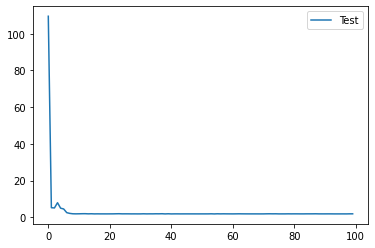

In [ ]:
# plt.plot(history.history['mean_absolute_error'],label='Training')
plt.plot(history.history['mean_absolute_error'],label='Test')
plt.legend()

In [ ]:
drive.mount('/drive')
model.save('/drive/My Drive/Colab Notebooks/EEG_Predict_Model.h5')

Mounted at /drive
